### Task 1

Maximum and Minimum Annual Income by Gender:
        max  min
Gender          
Female  126   16
Male    137   15
mean value of Spending by Gender:
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64
Maximum and Minimum Annual Income by Age:
           max  min
Age Group          
(20, 25]    77   15
(25, 30]   137   19
(30, 35]   137   17
(35, 40]   113   20
(40, 45]   126   28
(45, 50]   120   25
(50, 55]   101   23
(55, 60]    93   20
(60, 65]    65   19
(65, 70]    63   19
mean value of Spending by age:
Age Group
(20, 25]    63.285714
(25, 30]    70.666667
(30, 35]    60.305556
(35, 40]    53.291667
(40, 45]    27.916667
(45, 50]    37.384615
(50, 55]    35.090909
(55, 60]    30.166667
(60, 65]    36.800000
(65, 70]    47.250000
Name: Spending Score (1-100), dtype: float64
                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000           -0.012398               -0.327227   
Annual Income

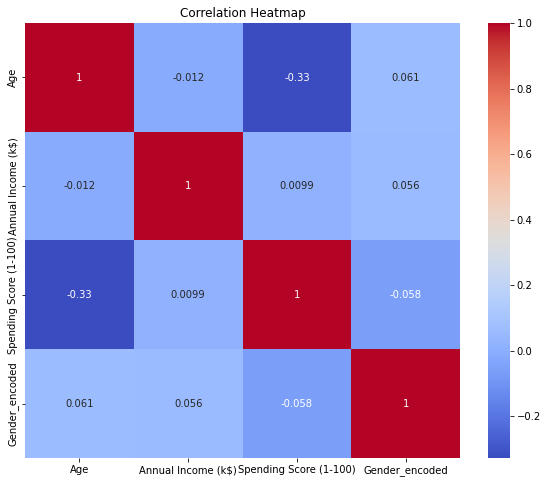

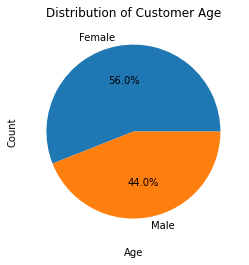

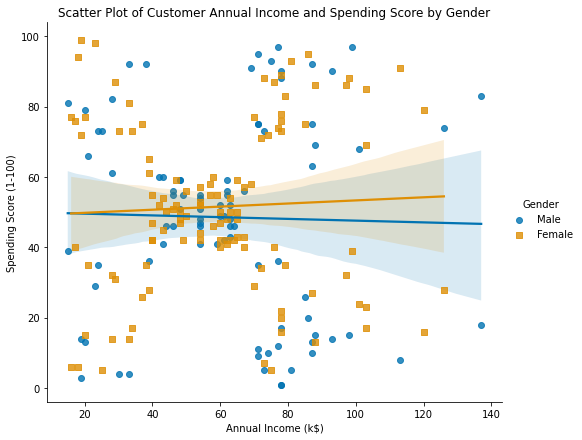

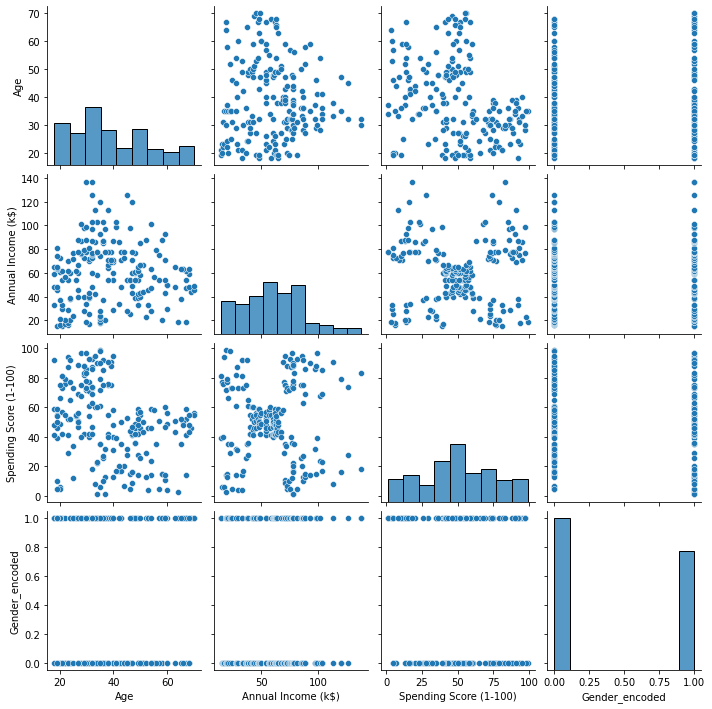

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install plotly
import plotly
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import adjusted_rand_score

#load data
data = pd.read_csv('customers.csv')

# Data prepration, cleaning check

data[data.isnull().any(axis=1) == True]   #display rows with missing values
data[data.columns[data.isnull().any() == True]]   #display columns with missing values

# print each column content
data['Gender'].unique()   
data['Annual Income (k$)'].unique()
data['Age'].unique()
data['Spending Score (1-100)'].unique()

# Drop the CustomerID column
data = data.drop(['CustomerID'], axis=1)
data['Gender_encoded'] = data['Gender'].replace({'Female': 0, 'Male': 1})

# Descriptive statistics

# Maximum and Min value of income and for each gender
# Group the data by gender and get the maximum and minimum values of annual income for each group
income_stats = data.groupby('Gender')['Annual Income (k$)'].agg(['max', 'min'])

# Print the maximum and minimum values of annual income for each gender
print('Maximum and Minimum Annual Income by Gender:')
print(income_stats)

# Group the data by gender and get the mean value of spending for each group
spending_stats = data.groupby('Gender')['Spending Score (1-100)'].mean()

# Print the mean value of spending for each gender
print('mean value of Spending by Gender:')
print(spending_stats)

# Maximum and Min value of income acording to age category

# Create a new column that categorizes age into five-year intervals
data['Age Group'] = pd.cut(data['Age'], bins=range(20, 71, 5))

# Group the data by age and get the maximum and minimum values of annual income for each group
age_income_stats = data.groupby('Age Group')['Annual Income (k$)'].agg(['max', 'min'])

# Print the maximum and minimum values of annual income for each gender
print('Maximum and Minimum Annual Income by Age:')
print(age_income_stats)

# Mean value of spending acording to age

# Group the data by gender and get the mean value of spending for each group
age_spending_stats = data.groupby('Age Group')['Spending Score (1-100)'].mean()

# Print the mean value of spending for each gender
print('mean value of Spending by age:')
print(age_spending_stats)

# Correlation analysis

# Calculate the correlation matrix
corr_matrix = data.corr(method='pearson')

# Print the correlation matrix
print(corr_matrix)

# Data visualization
# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#distribution of customer gender
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Frequency Distribution of Gender')


# Distribution of customers age
# Calculate the average age
average_age = data['Age'].mean()

# Plot the distribution of customer age
data['Age'].plot(kind='hist', bins=10, alpha=0.5, color='green', edgecolor='black', rwidth=0.8)
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2)

# Add a title and labels to the plot
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

# scatter plot of customer annual income and spending score by gender
# Create a scatter plot with regression line
sns.lmplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', 
           height=6, aspect=1.2, markers=['o', 's'], palette='colorblind')

# Add a title to the plot
plt.title('Scatter Plot of Customer Annual Income and Spending Score by Gender')

# Show the plot
plt.show()

# create a pair plot for each pair
sns.pairplot(data)

### Task 2

Explained Variance Ratio: [5.09304273e-01 4.89704675e-01 3.66283879e-04]


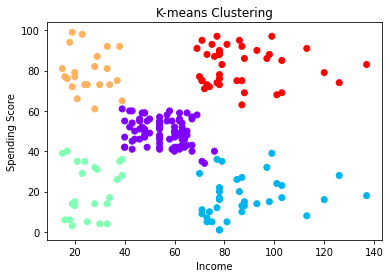

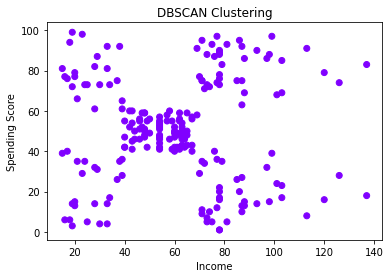

Silhouette score for K-Means clustering: 0.5527873217819409


In [2]:
# prepration for clustering

# define a function to categorize age into 5-year intervals
def age_to_group(age):
    return f"{(age//5)*5}-{((age//5)*5)+4}"

# create a new column with age groups
data['Age Group'] = data['Age'].apply(age_to_group)

# use pandas get_dummies() function to one-hot encode the Gender and AgeGroup columns
data = pd.get_dummies(data, columns=['Gender', 'Age Group'])

# drop the original Age column
data = data.drop('Age', axis=1)
data = data.drop('Gender_encoded', axis=1)

# Dimention reduction
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=3)

# Fit the data to the PCA model
pca.fit(data)

# Transform the data to the principal components
transformed_data = pca.transform(data)

# Access the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components (eigenvectors)
principal_components = pca.components_

# Clustering
#K-means
# set the number of clusters to 5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42, algorithm='full')
# fit the model to the data
kmeans.fit(transformed_data)
# get the cluster labels
labels = kmeans.labels_

# get the coordinates of the centroids
#centroids = kmeans.cluster_centers_

# add clusters to data
data['ClusterKmean'] = kmeans.fit_predict(transformed_data)

# plot the data points colored by their assigned cluster label
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=labels, cmap='rainbow')
# plot the centroids with black 'X' markers
#plt.scatter(centroids[:, 0], centroids[:, 1], s=200, linewidths=3, color='black')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

# DBSCAN
# set the maximum distance between two samples to be in the same neighborhood to 0.5
# set the minimum number of samples in a neighborhood to form a cluster to 5
dbscan = DBSCAN(eps=0.5, min_samples=5)
# fit the model to the data
dbscan.fit(transformed_data)
# get the cluster labels (-1 means the point is noise)
labels = dbscan.labels_

# add clusters to data
data['ClusterDBSCAN'] = dbscan.fit_predict(transformed_data)

# plot the data points colored by their assigned cluster label
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=labels, cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')
plt.show()

# Model evaluation
# Evaluate the Kmean clustering using silhouette score
silhouette = silhouette_score(data, kmeans.labels_)
print('Silhouette score for K-Means clustering:', silhouette)